In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, floor
from PIL import Image

%matplotlib inline

In [2]:
def nearest_interpolation(image, dimension):
    '''Nearest neighbor interpolation method to convert small image to original image
    Parameters:
    img (numpy.ndarray): Small image
    dimension (tuple): resizing image dimension

    Returns:
    numpy.ndarray: Resized image
    '''
    new_image = np.zeros((dimension[0], dimension[1], image.shape[2]))

    enlarge_time = int(
        sqrt((dimension[0] * dimension[1]) / (image.shape[0]*image.shape[1])))

    for i in range(dimension[0]):
        for j in range(dimension[1]):
            row = int(i / enlarge_time)
            column = int(j / enlarge_time)

            new_image[i, j] = image[row, column]

    return new_image

In [3]:
def bilinear_interpolation(image, dimension):
    '''Bilinear interpolation method to convert small image to original image
    Parameters:
    img (numpy.ndarray): Small image
    dimension (tuple): resizing image dimension

    Returns:
    numpy.ndarray: Resized image
    '''
    height = image.shape[0]
    width = image.shape[1]

    scale_x = (width)/(dimension[1])
    scale_y = (height)/(dimension[0])

    new_image = np.zeros((dimension[0], dimension[1], image.shape[2]))

    for i in range(dimension[0]):
        for j in range(dimension[1]):
            
            x = j*scale_x
            y = i*scale_y

            x_int = min(floor(x), width-2)
            y_int = min(floor(y), height-2)

            x_diff = x - x_int
            y_diff = y - y_int
            
            for k in range(3):
                a = image[y_int, x_int, k]
                b = image[y_int, x_int+1, k]
                c = image[y_int+1, x_int, k]
                d = image[y_int+1, x_int+1, k]
                                
                pixel = a*(1-y_diff)*(1-x_diff) + b*(1-y_diff)*x_diff + c*y_diff*(1-x_diff) + d*y_diff*x_diff

                new_image[i, j, k] = pixel.astype(np.uint8)

    return new_image

In [4]:

def read_image(path, scale:float = 1/5):
    '''Read image and return the image propertis.
    Parameters:
    path (string): Image path

    Returns:
    numpy.ndarray: Image exists in "path"
    list: Image size
    tuple: Image dimension (number of rows and columns)
    '''
    assert scale > 0
    img = cv2.imread(path)  # cv2.IMREAD_GRAYSCALE)
    size = img.shape
    
    img = cv2.resize(img, (int(size[1]*scale), int(size[0]*scale)))
    size = img.shape

    return img, size

In [5]:
img, size = read_image("./2.png", scale=1/3.5)

[ WARN:0@0.921] global loadsave.cpp:244 findDecoder imread_('./2.png'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
scale_rate = 4

new_dimension = (int(size[0]*scale_rate), int(size[1]*scale_rate))
nn_img_algo = nearest_interpolation(img, new_dimension)
nn_img_algo = Image.fromarray(nn_img_algo.astype('uint8')).convert('RGB')

bil_img_algo = bilinear_interpolation(img, new_dimension)
bil_img_algo = Image.fromarray(bil_img_algo.astype('uint8')).convert('RGB')

(-0.5, 343.5, 343.5, -0.5)

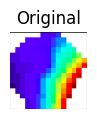

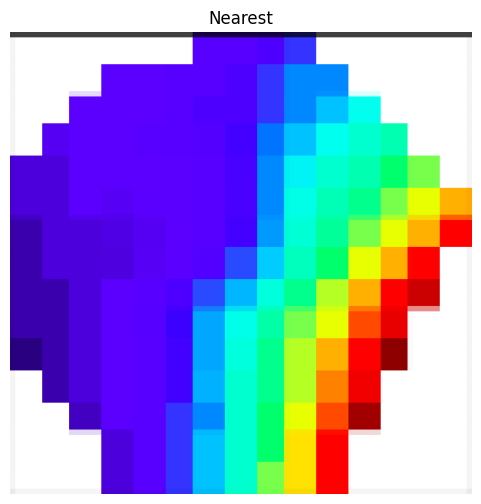

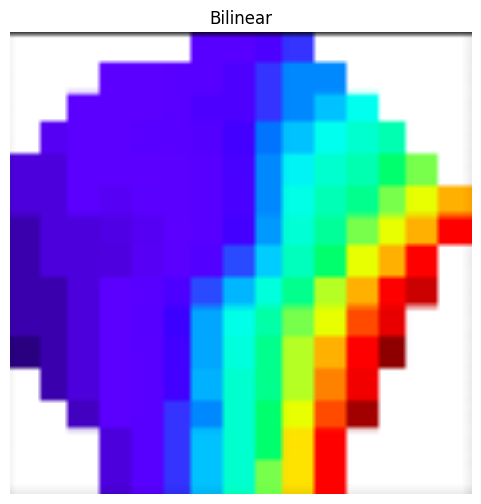

In [ ]:
fix_scale_plot = 50

plt.figure(figsize=(img.shape[1]//fix_scale_plot, img.shape[0]//fix_scale_plot))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f"Original")
plt.axis("off")

plt.figure(figsize=(nn_img_algo.size[1]//fix_scale_plot, nn_img_algo.size[0]//fix_scale_plot))
plt.imshow(cv2.cvtColor(np.array(nn_img_algo), cv2.COLOR_BGR2RGB))
plt.title(f"Nearest")
plt.axis("off")

plt.figure(figsize=(bil_img_algo.size[1]//fix_scale_plot, bil_img_algo.size[0]//fix_scale_plot))
plt.imshow(cv2.cvtColor(np.array(bil_img_algo), cv2.COLOR_BGR2RGB))
plt.title(f"Bilinear")
plt.axis("off")